In [1]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
dir_data = "/Users/steven/Part01"
f_app_train = os.path.join(dir_data , 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )

app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])

In [5]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)

age_data = app_train[["TARGET" , "DAYS_BIRTH"]]
age_data["YEARS_BIRTH"] = age_data["DAYS_BIRTH"] / 365


#自 20 到 70 歲，切 11 個點 (得到 10 組)

bin_cut = [19,25,30,35,40,45,50,55,60,65,71]

age_data["YEARS_BINNED"] = pd.cut(age_data["YEARS_BIRTH"] , bins = bin_cut)
print(age_data["YEARS_BINNED"].value_counts())

print(age_data.head())

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(19, 25]    12159
(65, 71]     8103
Name: YEARS_BINNED, dtype: int64
   TARGET  DAYS_BIRTH  YEARS_BIRTH YEARS_BINNED
0       1        9461    25.920548     (25, 30]
1       0       16765    45.931507     (45, 50]
2       0       19046    52.180822     (50, 55]
3       0       19005    52.068493     (50, 55]
4       0       19932    54.608219     (50, 55]


/Users/steven/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/steven/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = list(age_data["YEARS_BINNED"].value_counts().sort_index().index)
year_group_sorted


[Interval(19, 25, closed='right'),
 Interval(25, 30, closed='right'),
 Interval(30, 35, closed='right'),
 Interval(35, 40, closed='right'),
 Interval(40, 45, closed='right'),
 Interval(45, 50, closed='right'),
 Interval(50, 55, closed='right'),
 Interval(55, 60, closed='right'),
 Interval(60, 65, closed='right'),
 Interval(65, 71, closed='right')]

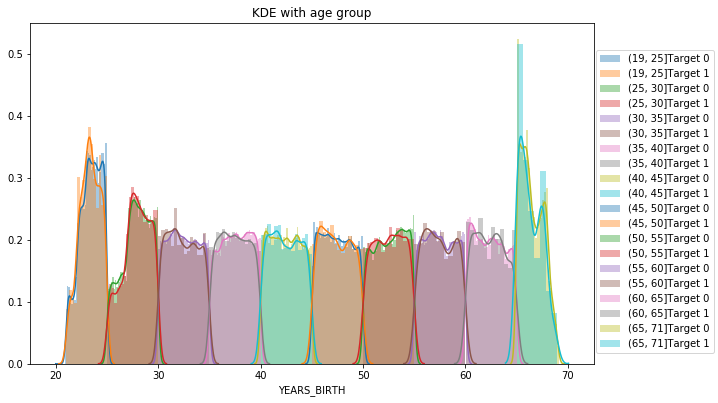

In [26]:
import seaborn as sns

fig = plt.figure(figsize = (10,6))

for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data["YEARS_BINNED"] == year_group_sorted[i]) & 
                              (age_data["TARGET"] == 0) , "YEARS_BIRTH"] , label = str(year_group_sorted[i]) + 'Target 0')
     
    sns.distplot(age_data.loc[(age_data["YEARS_BINNED"] == year_group_sorted[i]) & 
                              (age_data["TARGET"] == 1) , "YEARS_BIRTH"] , label = str(year_group_sorted[i]) + 'Target 1')
    
plt.title("KDE with age group")
fig.legend( loc ='center right')
plt.tight_layout(rect=[0,0,0.85,0.95])
plt.show()

In [28]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值

age_group_mean = age_data.groupby("YEARS_BINNED").mean()
age_group_mean

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(19, 25]",0.123036,8532.795625,23.377522
"(25, 30]",0.111436,10155.219250,27.822518
"(30, 35]",0.102814,11854.848377,32.479037
"(35, 40]",0.089414,13707.908253,37.555913
"(40, 45]",0.078491,15497.661233,42.459346
"(45, 50]",0.074171,17323.900441,47.462741
"(50, 55]",0.066968,19196.494791,52.593136
"(55, 60]",0.055314,20984.262742,57.491131
"(60, 65]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

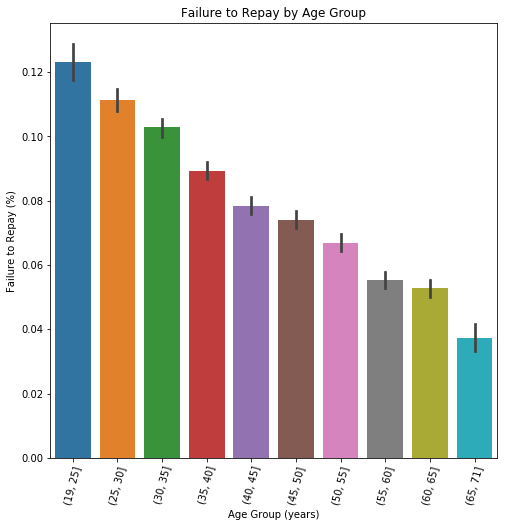

In [36]:
plt.figure(figsize = (8,8))

px = age_data["YEARS_BINNED"]
py = age_data["TARGET"]

# 以年齡區間為 x, target 為 y 繪製 barplot
sns.barplot(px,py)

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')